# $$\text{Анализ датасета "Disease-Symptom Dataset"}$$

$$\text{Работа выполнена студентом 2 курса СПбГУ Лысенко Л. М.}$$
$$\text{по направлению "ИИиНоД" в рамках курсовой работы}$$

$Ссылка~на~датасет:$ https://www.kaggle.com/datasets/dhivyeshrk/diseases-and-symptoms-dataset

$\text{Импортируем библиотеки для работы с данными датасета:}$

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import re

$\text{Загружаем исходный датасет:}$

In [ ]:
raw_dataset = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

$\text{Смотрим первые пять строк:}$

In [3]:
raw_dataset.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


$\text{Изучим информацию:}$

In [4]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


$\text{Видим информацию о 378 столбцах => 377 симптомов и столбец с заболеваниями.}$

$\text{Также всего 246945 строк с заболеваниями.}$

$\text{Найдем количество уникальных заболеваний:}$

In [11]:
len(raw_dataset["diseases"].unique())

773

$\text{Высчитаем для каждого заболевания, сколько раз он встречается в датасете:}$

In [12]:
raw_dataset["diseases"].value_counts()

diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
open wound of the head               1
myocarditis                          1
chronic ulcer                        1
hypergammaglobulinemia               1
kaposi sarcoma                       1
Name: count, Length: 773, dtype: int64

$\text{Найдем количество заболеваний, встречающихся более 1000 раз в датасете:}$

In [14]:
sum(raw_dataset["diseases"].value_counts() > 1000)

37

$\text{В процентном соотношении к общему числу заболеваний:}$

In [19]:
print(
    f"Процентное соотношение к общему числу заболеваний: {np.round(100*37/773, 2)} процента."
)

Процентное соотношение к общему числу заболеваний: 4.79 процента.


$\text{Найдем количество заболеваний, встречающихся менее 100 раз в датасете:}$

In [15]:
sum(raw_dataset["diseases"].value_counts() < 100)

330

$\text{В процентном соотношении к общему числу заболеваний:}$

In [20]:
print(
    f"Процентное соотношение к общему числу заболеваний: {np.round(100*330/773, 2)} процента."
)

Процентное соотношение к общему числу заболеваний: 42.69 процента.


$\text{Рассмотрим распределение болезней в датасете:}$

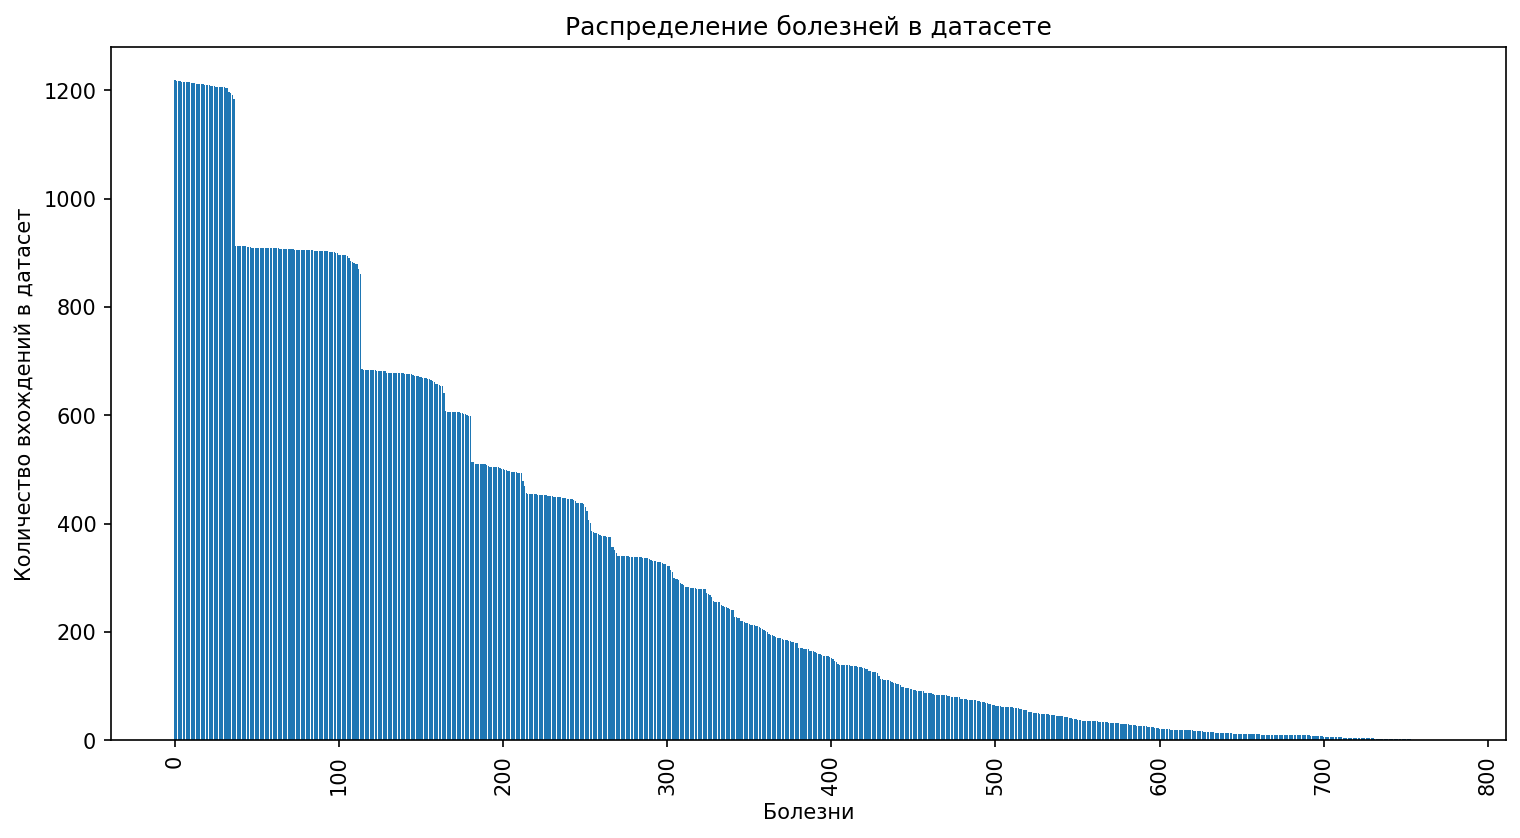

In [ ]:
# Считаем общее количество упоминаний каждого заболевания во всем датасете
disease_counts = raw_dataset["diseases"].value_counts()

plt.figure(figsize=(12, 6), dpi=150)
plt.bar(range(len(disease_counts)), disease_counts.values)
plt.title("Распределение болезней в датасете")
plt.xlabel("Болезни")
plt.ylabel("Количество вхождений в датасет")
plt.xticks(rotation=90)
plt.show()

$\text{Высчитаем для каждого симптома, сколько раз он встречается в датасете:}$

In [63]:
raw_dataset.iloc[:, 1:].sum().sort_values(ascending=False)

sharp abdominal pain            32307
vomiting                        27874
headache                        24719
cough                           24296
sharp chest pain                24016
                                ...  
lump over jaw                       0
hip weakness                        0
back swelling                       0
ankle stiffness or tightness        0
neck weakness                       0
Length: 377, dtype: int64

$\text{Найдем количество симптомов, которые не встречаются ни у одного заболевания:}$

In [68]:
sum(raw_dataset.iloc[:, 1:].sum().sort_values(ascending=False) == 0)

49

$\text{Рассмотрим распределение симптомов в датасете:}$

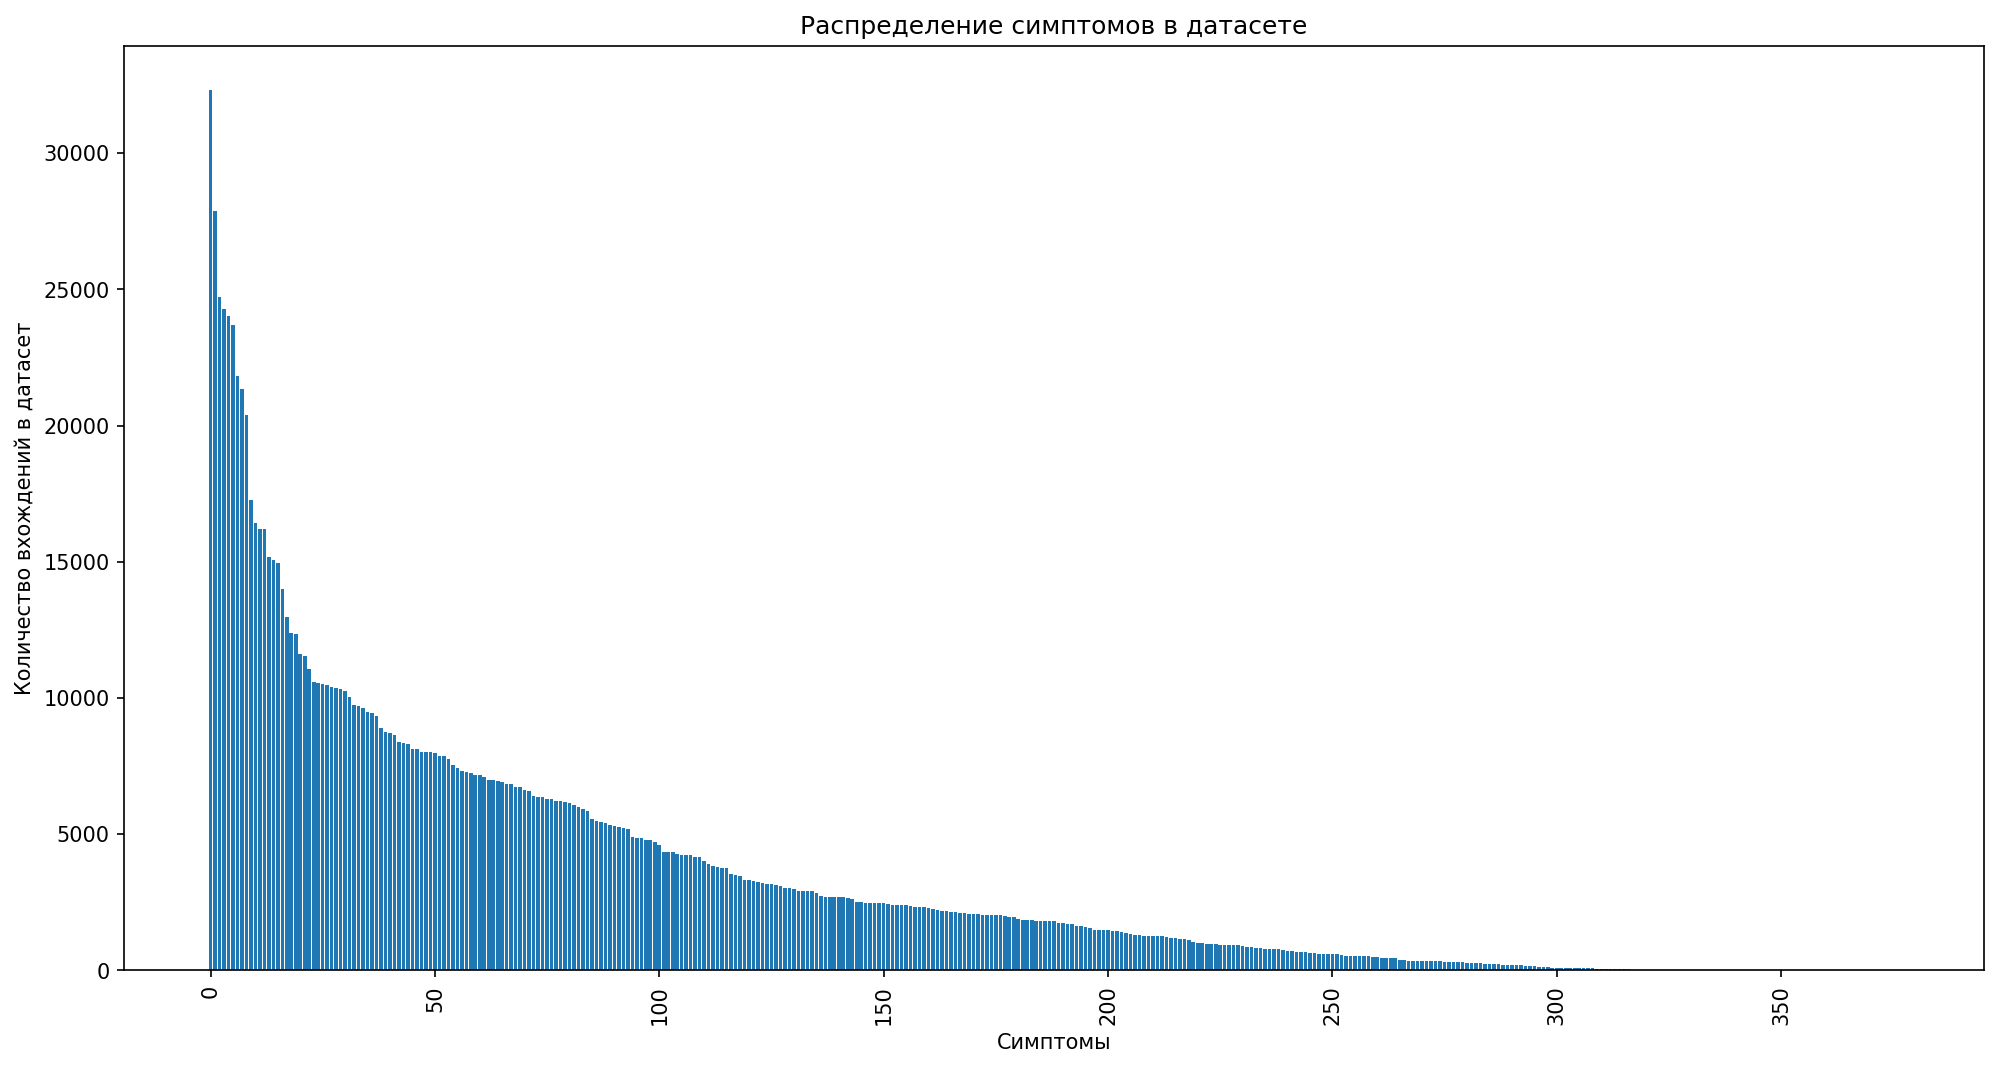

In [71]:
# Считаем общее количество упоминаний каждого симптома во всем датасете
symptom_counts = raw_dataset.iloc[:, 1:].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 8), dpi=150)
plt.bar(range(len(symptom_counts)), symptom_counts.values)
plt.title("Распределение симптомов в датасете")
plt.xlabel("Симптомы")
plt.ylabel("Количество вхождений в датасет")
plt.xticks(rotation=90)
plt.show()

$\text{Проверим датасет на отсутствующие данные (согласно характеристикам датасета на Kaggle их быть не должно):}$

In [77]:
raw_dataset.isnull().any().any()

np.False_

$\text{Рассмотрим заболевания и симптомы с цифрами в названии:}$

In [114]:
# Функция для проверки наличия цифр в строке
def has_digits(text):
    return bool(re.search(r"\d", str(text)))

In [115]:
# Поиск заболеваний с цифрами в названии
for disease in raw_dataset["diseases"].unique():
    if has_digits(disease):
        print(disease)

vitamin b12 deficiency
g6pd enzyme deficiency


In [116]:
# Получаем названия симптомов (все столбцы кроме первого)
symptoms = raw_dataset.columns[1:]

# Поиск симптомов с цифрами в названии
for symptom in symptoms:
    if has_digits(symptom):
        print(symptom)

regurgitation.1


$\text{Проверка на вхождение "regurg" в названия симптомов для анализа "regurgitation.1"}$

In [119]:
# Поиск симптомов, содержащих "regurg"
symptoms_with_reg = symptoms[symptoms.str.contains("regurg", case=False, na=False)]

for symptom in symptoms_with_reg:
    print(symptom)

regurgitation
regurgitation.1


$\text{Топ-10 самых частых симптомов в датасете:}$

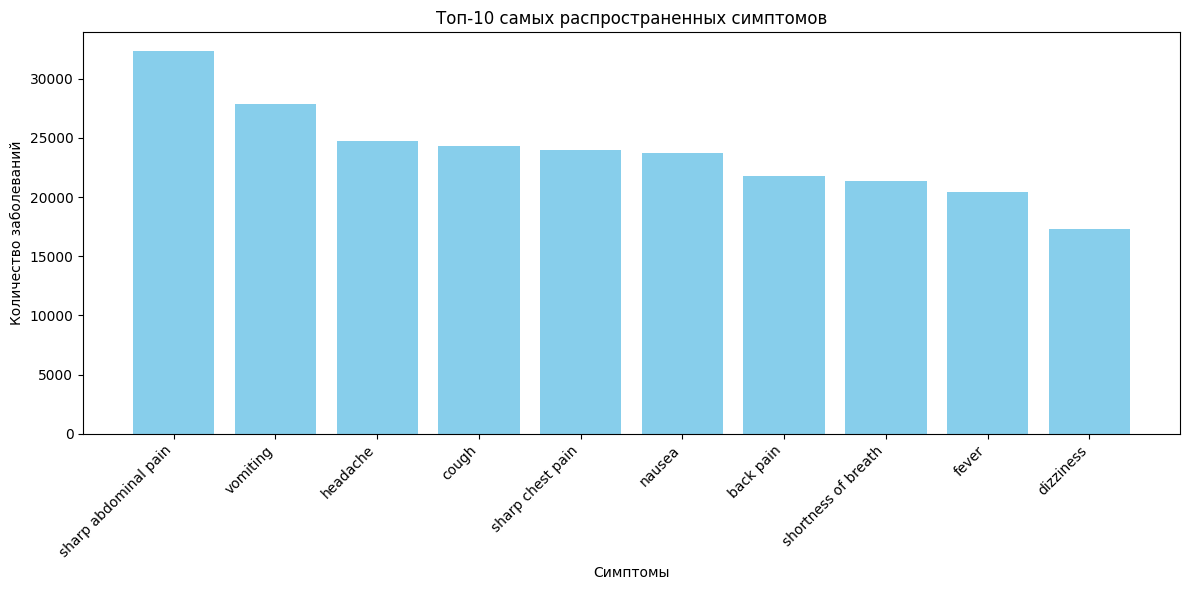

In [78]:
# Анализ самых частых симптомов в целом
top_symptoms = raw_dataset.iloc[:, 1:].sum().nlargest(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_symptoms)), top_symptoms.values, color="skyblue")
plt.title("Топ-10 самых распространенных симптомов")
plt.xlabel("Симптомы")
plt.ylabel("Количество заболеваний")
plt.xticks(range(len(top_symptoms)), top_symptoms.index, rotation=45, ha="right")
plt.tight_layout()
plt.show()

$\text{Проведем анализ распределения симптомов по заболеваниям:}$

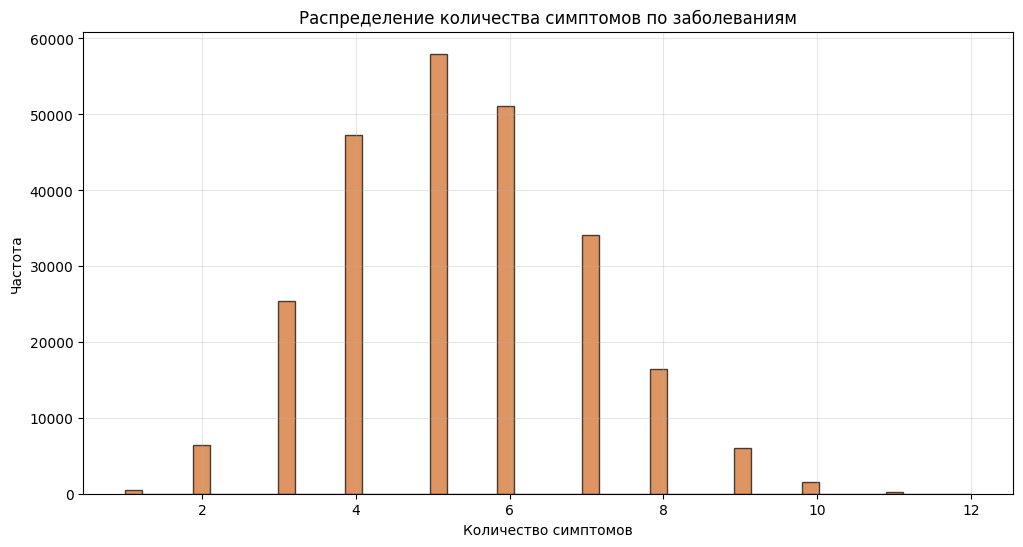

In [87]:
symptoms_per_disease = raw_dataset.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(12, 6))
plt.hist(symptoms_per_disease, bins=50, alpha=0.7, color="chocolate", edgecolor="black")
plt.title("Распределение количества симптомов по заболеваниям")
plt.xlabel("Количество симптомов")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()

$\text{Построим матрицу корреляции между 20 самыми частыми симптомами:}$

<Axes: >

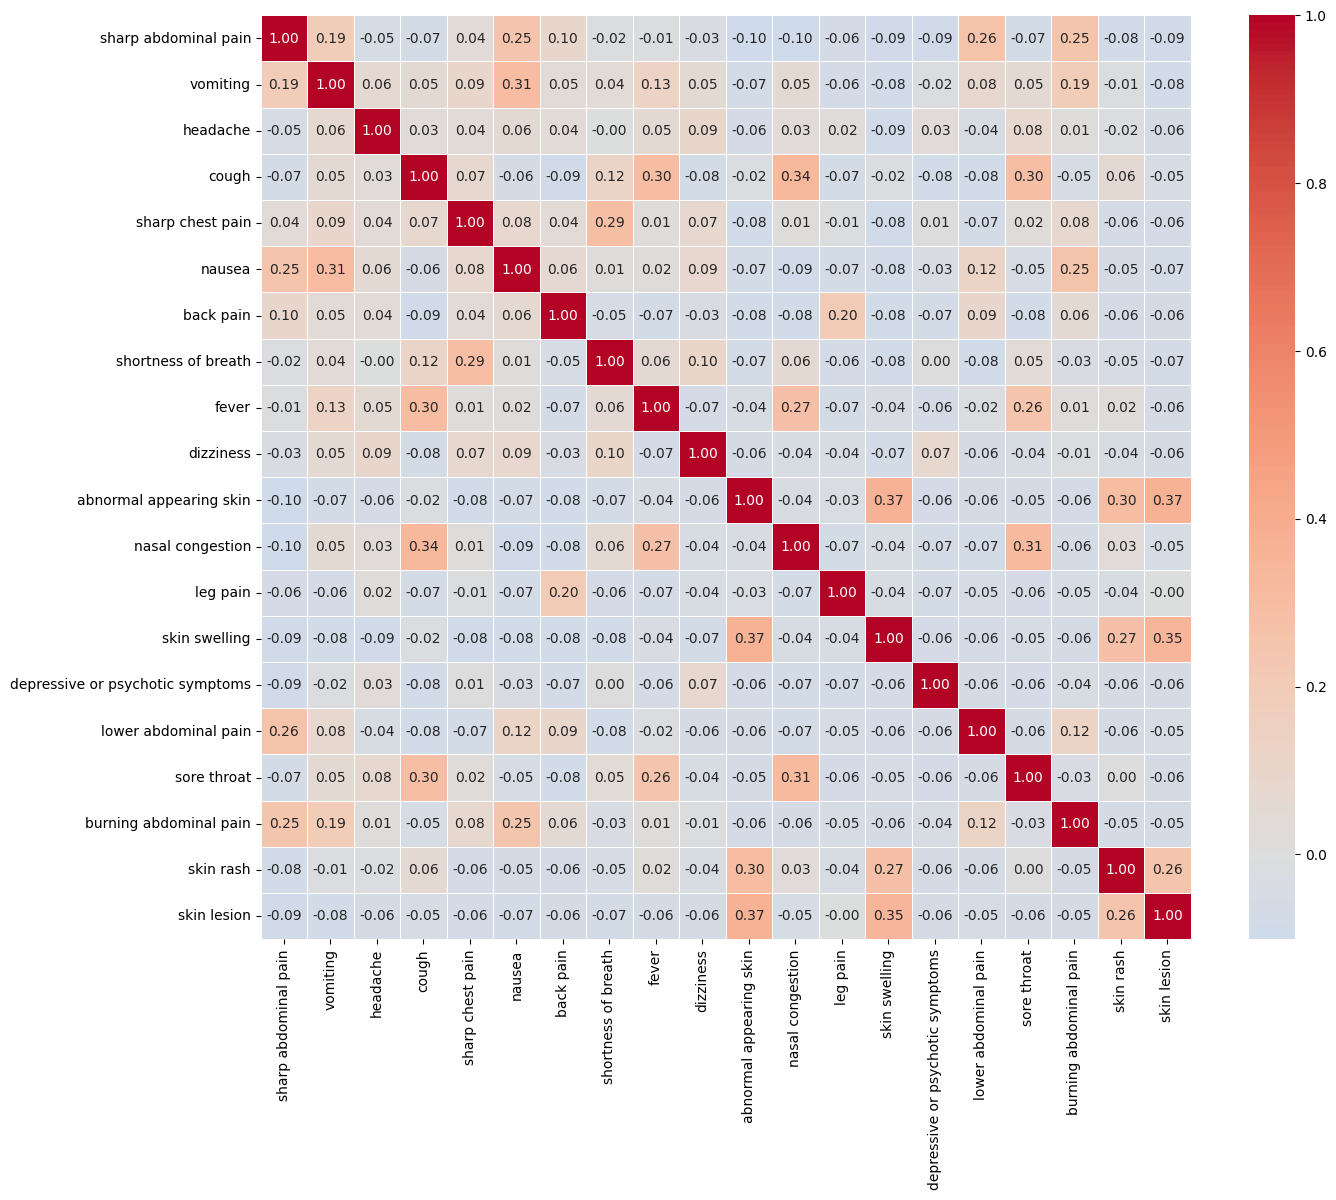

In [91]:
top_symptoms = raw_dataset.iloc[:, 1:].sum().nlargest(20).index
correlation_matrix = raw_dataset[top_symptoms].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5
)

$\text{Найдем топ-20 заболеваний по количеству симптомов в целом:}$

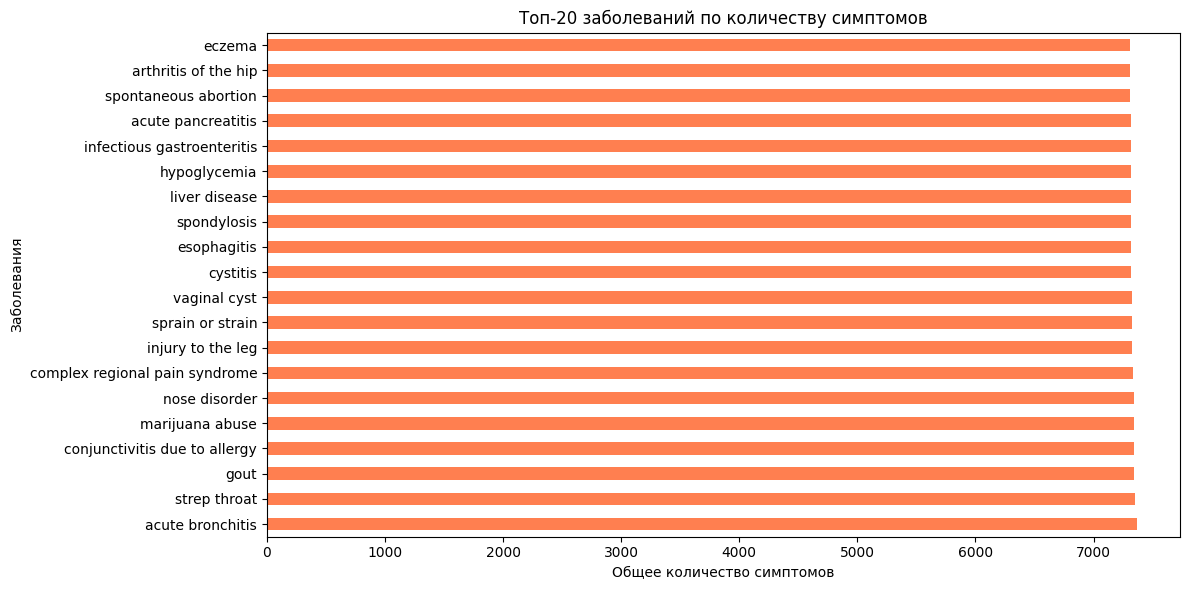

In [105]:
severe_diseases = raw_dataset.groupby("diseases").sum().sum(axis=1).nlargest(20)

plt.figure(figsize=(12, 6))
severe_diseases.plot(kind="barh", color="coral")
plt.title("Топ-20 заболеваний по количеству симптомов")
plt.xlabel("Общее количество симптомов")
plt.ylabel("Заболевания")
plt.tight_layout()
plt.show()

$\text{Проведем анализ совместной встречаемости симптомов:}$

In [ ]:
# Находим пары симптомов, которые часто встречаются вместе

# Берем топ-15 симптомов для анализа
top_15_symptoms = raw_dataset.iloc[:, 1:].sum().nlargest(15).index
co_occurrence = []

for symptom1, symptom2 in combinations(top_15_symptoms, 2):
    co_occurrence_count = (
        (raw_dataset[symptom1] == 1) & (raw_dataset[symptom2] == 1)
    ).sum()
    co_occurrence.append((symptom1, symptom2, co_occurrence_count))

# Сортируем по частоте совместной встречаемости
co_occurrence.sort(key=lambda x: x[2], reverse=True)

print("Топ-10 пар симптомов по совместной встречаемости:")
for i, (s1, s2, count) in enumerate(co_occurrence[:10], 1):
    print(f"{i}. {s1} + {s2}: {count} случаев")

Топ-10 пар симптомов по совместной встречаемости:
1. vomiting + nausea: 9698 случаев
2. sharp abdominal pain + nausea: 9292 случаев
3. sharp abdominal pain + vomiting: 8676 случаев
4. cough + fever: 8115 случаев
5. sharp chest pain + shortness of breath: 8058 случаев
6. cough + nasal congestion: 7712 случаев
7. abnormal appearing skin + skin swelling: 6536 случаев
8. fever + nasal congestion: 5960 случаев
9. sharp abdominal pain + back pain: 5126 случаев
10. vomiting + fever: 5057 случаев


### $Результаты:$

$\text{1. Датасет содержит 773 заболевания и 377 симптомов;}$

$\text{2. Обнаружен сильный дисбаланс классов: присутствуют заболевания,}$  $\text{встречающиеся более 1000 раз и менее 10;}$

$\text{3. В процентном соотношении к общему количеству заболевания,}$  $\text{встречающиеся более 1000 раз, составляют менее 5 процентов;}$

$\text{3. В процентном соотношении к общему количеству заболевания,}$  $\text{встречающиеся менее 100 раз, составляют более 42 процентов;}$

$\text{4. Рассмотрены распределения заболеваний и симптомов в датасете;}$

$\text{5; Отстутствующие данные не выявлены;}$

$\text{6. Рассмотрены заболевания и симптомы с цифрами в названии:}$  $\text{выявлены 2 "странных" одинаковых названия симптомов}$  $\text{(egurgitation и regurgitation.1);}$

$\text{7. Найдены самые частые заболевания в датасете (топ-10)}$ $\text{и самые частые заболевания по количеству симптомов в целом (топ-20);}$

$\text{8. Проведен анализ распределения симптомов по заболеваниям;}$

$\text{9. Построим матрицу корреляции между 20 самыми частыми симптомами:}$  $\text{в целом корреляция низкая (max=0.37);}$

$\text{10. Проведен анализ совместной встречаемости симптомов (топ-10 частых случаев).}$ 